<hr>
<a href = 'https://drive.google.com/file/d/1P_jFdkc6FEai2W3RwcF5z5UIA60Our4Q/view?usp=sharing'><b>DATASET</b></a>
<br>
This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

Following is the Data Dictionary for Credit Card dataset :-

- CUST_ID : Identification of Credit Card holder (Categorical)
- BALANCE : Balance amount left in their account to make purchases (
- BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
- PURCHASES : Amount of purchases made from account
- ONEOFF_PURCHASES : Maximum purchase amount done in one-go
- INSTALLMENTS_PURCHASES : Amount of purchase done in installment
- CASH_ADVANCE : Cash in advance given by the user
- PURCHASES_FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
- ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
- PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
- CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
- CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
- PURCHASES_TRX : Numbe of purchase transactions made
- CREDIT_LIMIT : Limit of Credit Card for user
- PAYMENTS : Amount of Payment done by user
- MINIMUM_PAYMENTS : Minimum amount of payments made by user
- PRCFULLPAYMENT : Percent of full payment paid by user
- TENURE : Tenure of credit card service for user

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r2
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from sklearn.preprocessing import MinMaxScaler
normalizer = MinMaxScaler()
from sklearn.preprocessing import StandardScaler
normalizer = StandardScaler()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [32]:
data = pd.read_csv('dataset\CC GENERAL.csv')

In [33]:
G = data.copy()
G.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12


PREPROCESSING

In [34]:
# Standard Scale the Numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

x = G[['PURCHASES', 'PAYMENTS']]
for i in x.columns:
  x[[i]] = scaler.fit_transform(x[[i]])

x.head()

,PURCHASES,PAYMENTS
0,-0.424900,-0.528979
1,-0.469552,0.818642
2,-0.107668,-0.383805
3,0.232058,-0.598688
4,-0.462063,-0.364368


In [35]:
# write a function that calculates the number of missing values in  dataframeframe
def cleandata(dataframe):
    for i in dataframe.columns:
        if (dataframe[i].isnull().sum() / dataframe.shape[0]) * 100 >= 30:
            dataframe.drop([i], axis = 1, inplace = True)
    
cleandata(G)
G.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [36]:
#install yellowbrick to vizualize the Elbow curve
%pip install yellowbrick  --q

Note: you may need to restart the kernel to use updated packages.


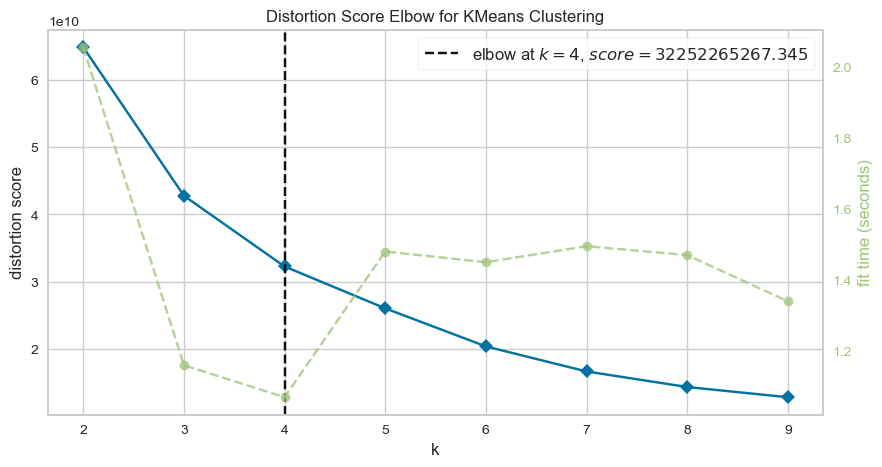

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [37]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

x = G[['PURCHASES', 'PAYMENTS']]

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(x) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [38]:
kmeans_4 = KMeans(n_clusters = 4).fit(x) # ....................... Fit Kmeans Algorthm on the Data Subset
X = x.values
k_means_label = kmeans_4.labels_ # ............................... Instantiate the labels of the model

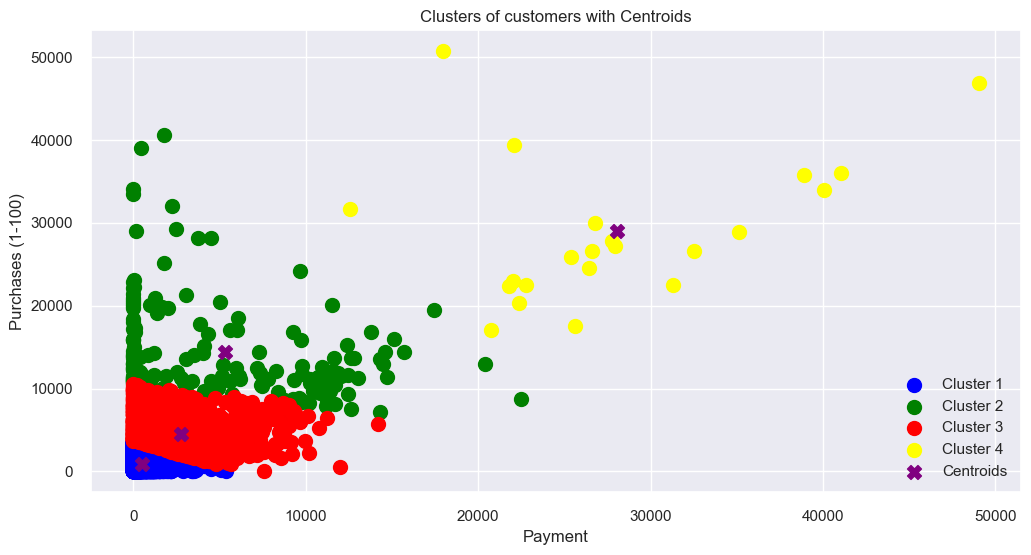

In [39]:
# Fit Kmeans Algorithm on the Data Subset with 5 clusters
kmeans_4 = KMeans(n_clusters=4).fit(x)

X = x.values
k_means_label = kmeans_4.labels_
centroids = kmeans_4.cluster_centers_  # Get the cluster centroids

# Plot the dataset using the model labelling to colour code them
plt.figure(figsize=(12, 6))
sns.set(style='darkgrid')

# Scatter plots for each cluster's data points
plt.scatter(X[k_means_label == 0, 0], X[k_means_label == 0, 1], s=100, c='blue', label='Cluster 1')
plt.scatter(X[k_means_label == 1, 0], X[k_means_label == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[k_means_label == 2, 0], X[k_means_label == 2, 1], s=100, c='red', label='Cluster 3')
plt.scatter(X[k_means_label == 3, 0], X[k_means_label == 3, 1], s=100, c='yellow', label='Cluster 4')

# Scatter plot for centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='purple', marker='X', label='Centroids')

# Adding plot labels and legend
plt.title('Clusters of customers with Centroids')
plt.xlabel('Payment')
plt.ylabel('Purchases (1-100)')
plt.legend()
plt.show()


In [40]:
# Add the labels on the dataframe
cluster_labels = kmeans_4.fit_predict(x)
G['K_Means'] = cluster_labels
# G['K_Means'] = G.K_Means.replace({1:'lw_pur and lw_pay', 2:'hi_pur and hi_pay', 3:'md_pur and md_pay', 4: 'hi_pur and lw_pay' })

qualified = []

for i in G.K_Means:
  if i > 2:
    qualified.append('qualify')
  elif i < 3:
    qualified.append('Not Qualified')

qualified = pd.Series(qualified)
G['Status'] = qualified

display(G.head())
sns.countplot(G.Status)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,K_Means,Status
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1,Not Qualified
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Not Qualified
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1,Not Qualified
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12,1,Not Qualified
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1,Not Qualified


ValueError: could not convert string to float: 'Not Qualified'

In [41]:
x = G.drop(['Status', 'K_Means', 'CUST_ID'], axis = 1)
y = G.Status

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

y = lb.fit_transform(y)
y = pd.DataFrame(y) 
y.head()

,0
0,0
1,0
2,0
3,0
4,0


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

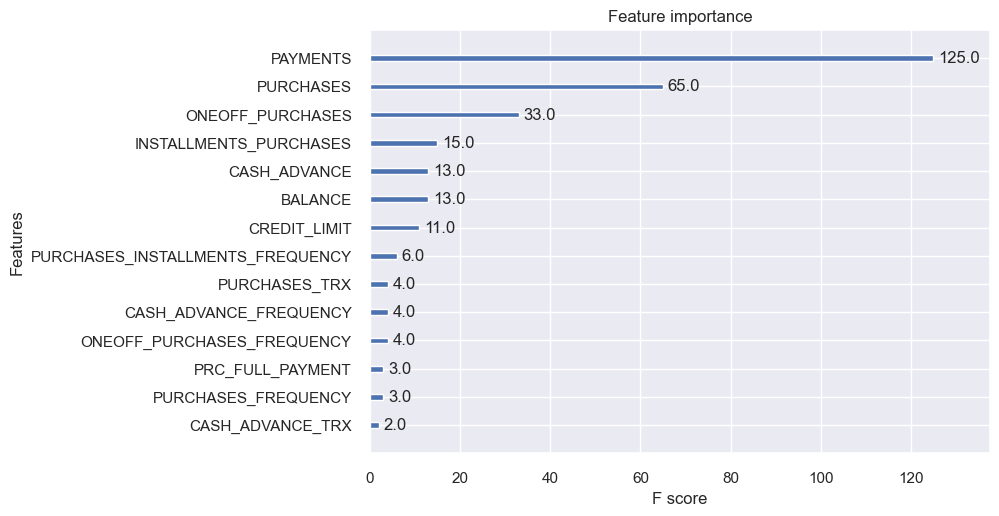

In [42]:
# Using the Select K best and XGBoost Feature elimination Method

# - Using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x, y)

# Print feature importance scores
xgb.plot_importance(model)

In [43]:
features = ['PAYMENTS', 'PURCHASES', 'ONEOFF_PURCHASES', 'MINIMUM_PAYMENTS', 'CREDIT_LIMIT', 'INSTALLMENTS_PURCHASES', 'BALANCE', 'PURCHASES_TRX']
new_features = x[features]

In [44]:
new_features.head()

,PAYMENTS,PURCHASES,ONEOFF_PURCHASES,MINIMUM_PAYMENTS,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,BALANCE,PURCHASES_TRX
0,201.802084,95.40,0.00,139.509787,1000.0,95.4,40.900749,2
1,4103.032597,0.00,0.00,1072.340217,7000.0,0.0,3202.467416,0
2,622.066742,773.17,773.17,627.284787,7500.0,0.0,2495.148862,12
3,0.000000,1499.00,1499.00,NaN,7500.0,0.0,1666.670542,1
4,678.334763,16.00,16.00,244.791237,1200.0,0.0,817.714335,1


In [45]:
# - split into train and test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(new_features, y, test_size = 0.15, random_state = 45, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (7607, 8)
x_test: (1343, 8)
y_train: (7607, 1)
y_test: (1343, 1)


In [ ]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm_model = rfm.fit(x_train, y_train)
cross_validate = rfm_model.predict(x_train)
sklearn.metrics.accuracy_score(y_train, cross_validate)

In [ ]:
from sklearn.metrics import classification_report
prediction = rfm_model.predict(x_test)
print(classification_report(y_test, prediction))

NUMBER 2

In [ ]:
# sel_cols = ['CUST_ID', 'K_Means']
# solution = G[sel_cols]
# solution

,CUST_ID,K_Means
0,C10001,0
1,C10002,md_pur and md_pay
2,C10003,0
3,C10004,0
4,C10005,0
...,...,...
8945,C19186,0
8946,C19187,0
8947,C19188,0
8948,C19189,0


In [ ]:
lowpurch_lowpay = solution.loc[solution.K_Means  == 'lw_pur and lw_pay']
lowpurch_lowpay

,CUST_ID,K_Means
138,C10144,lw_pur and lw_pay
273,C10284,lw_pur and lw_pay
501,C10523,lw_pur and lw_pay
507,C10529,lw_pur and lw_pay
550,C10574,lw_pur and lw_pay
587,C10611,lw_pur and lw_pay
854,C10885,lw_pur and lw_pay
970,C11004,lw_pur and lw_pay
1190,C11234,lw_pur and lw_pay
1256,C11300,lw_pur and lw_pay


In [ ]:
mid_mid = solution.loc[solution.K_Means  == 'md_pur and md_pay']
mid_mid

,CUST_ID,K_Means
1,C10002,md_pur and md_pay
6,C10007,md_pur and md_pay
21,C10022,md_pur and md_pay
23,C10024,md_pur and md_pay
30,C10031,md_pur and md_pay
...,...,...
8737,C18975,md_pur and md_pay
8748,C18987,md_pur and md_pay
8835,C19076,md_pur and md_pay
8857,C19098,md_pur and md_pay


In [ ]:
hipurch_lowpay = solution.loc[solution.K_Means  == 'hi_pur and lw_pay']
hipurch_lowpay

,CUST_ID,K_Means


In [ ]:
hi_hi = solution.loc[solution.K_Means  == 'hi_pur and hi_pay']
hi_hi

,CUST_ID,K_Means
39,C10040,hi_pur and hi_pay
71,C10074,hi_pur and hi_pay
109,C10114,hi_pur and hi_pay
125,C10131,hi_pur and hi_pay
153,C10159,hi_pur and hi_pay
...,...,...
7277,C17473,hi_pur and hi_pay
7426,C17629,hi_pur and hi_pay
7553,C17757,hi_pur and hi_pay
7645,C17851,hi_pur and hi_pay
